# WEEK 7 TUTORIAL

In [1]:
import os
import pandas as pd
os.chdir("C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2")
os.getcwd()

'C:\\Users\\Nicol Foo\\OneDrive\\Desktop\\School stuff\\MONASH\\FIT1043 - 2022 S2'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import regressiondemo as rd
%matplotlib inline

## Classification

In [3]:
dataset = pd.read_csv('TravelInfo.csv')

In [4]:
dataset.shape
dataset.head()

,Age,Income,TravelAbroad
0,22,25000,0
1,38,26000,0
2,29,49000,0
3,30,63000,0
4,22,82000,0


#### Practice 1: If we use the whole dataset as the training data, how do we know how good our model is?

In [5]:
x = dataset.iloc[:, [0, 1]].values # Input Data: Age and Income
y = dataset.iloc[:, 2].values # Labeled Data: Travelled or not

In [6]:
x[-5:]

array([[   49, 47000],
       [   54, 29000],
       [   53, 26000],
       [   39, 39000],
       [   52, 42000]], dtype=int64)

In [7]:
y[395:400]

array([1, 1, 1, 0, 1], dtype=int64)

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
x, y, test_size = 0.25, random_state = 0
)

### Feature Scaling

In [9]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [10]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
criterion = 'entropy', random_state = 0
)
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [11]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [12]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[62,  6],
       [ 3, 29]], dtype=int64)

### Visualisation

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


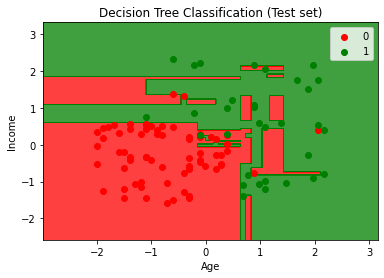

In [13]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(
    np.arange(
        start = X_set[:, 0].min() - 1,
        stop = X_set[:, 0].max() + 1,
        step = 0.01
    ),
    np.arange(
        start = X_set[:, 1].min() - 1,
        stop = X_set[:, 1].max() + 1,
        step = 0.01
    )
)
plt.contourf(
    X1,
    X2,
    classifier.predict(
        np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
    alpha = 0.75,
    cmap = ListedColormap(('red', 'green'))
)
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(
        X_set[y_set == j, 0],
        X_set[y_set == j, 1],
        c = ListedColormap(('red', 'green'))(i),
        label = j
)
plt.title('Decision Tree Classification (Test set)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend()
plt.show()

### Random Forest

In [14]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
n_estimators = 20,
criterion = 'entropy',
random_state = 0
)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[63,  5],
       [ 3, 29]], dtype=int64)

In [15]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(
n_estimators = 40,
criterion = 'entropy',
random_state = 0
)
classifier.fit(X_train, y_train)
# Predicting the Test set results
y_pred = classifier.predict(X_test)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[64,  4],
       [ 2, 30]], dtype=int64)

## Clustering

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Load the dataset from Moodle
df = pd.read_csv('Drivers.csv')
df.head()

,Driver_ID,Distance_Feature,Speeding_Feature
0,3423311935,71.24,28
1,3423313212,52.53,25
2,3423313724,64.54,27
3,3423311373,55.69,22
4,3423310999,54.58,25


In [17]:
# Check the dataset dimension
df.shape

(4000, 3)

Text(0, 0.5, 'Speeding_Feature')

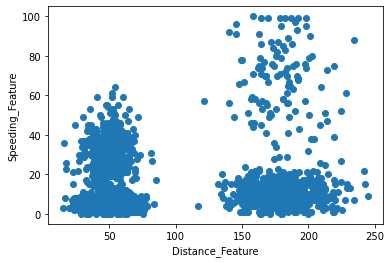

In [18]:
#Visualise the dataset (Distance vs Speeding)
plt.scatter(x=df['Distance_Feature'],y=df['Speeding_Feature'])
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')

In [19]:
# Run the K-means clustering over the dataset using only
# distance and speeding features. Set K=2: we only want
# to cluster the dataset into two subgroups
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2).fit(
df[['Distance_Feature','Speeding_Feature']]
)

In [20]:
# Look at the outputs: Two cluster centers
kmeans.cluster_centers_
# Look at the outputs: Cluster labels
kmeans.labels_

array([1, 1, 1, ..., 0, 0, 0])

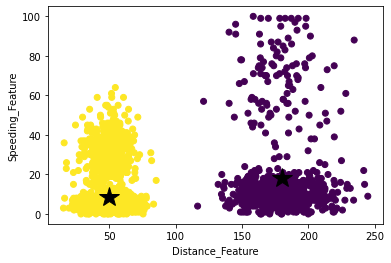

In [21]:
# Visualise the output labels
plt.scatter(
    x=df['Distance_Feature'],
    y=df['Speeding_Feature'],
    c=kmeans.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

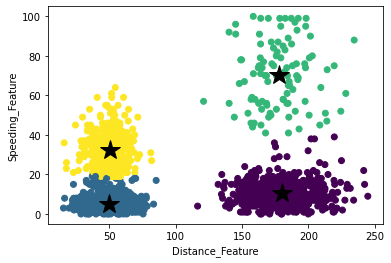

In [22]:
# Run K-means with another K value
# Set K=4: we want to cluster the dataset into four subgroups
kmeans2 = KMeans(n_clusters=4).fit(
    df[['Distance_Feature','Speeding_Feature']]
)
# Visualise the output labels
plt.scatter(
    x=df['Distance_Feature'],
    y=df['Speeding_Feature'],
    c=kmeans2.labels_
)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans2.cluster_centers_[:,0],
    kmeans2.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()

In [23]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
df[['Distance_Feature','Speeding_Feature']]
)

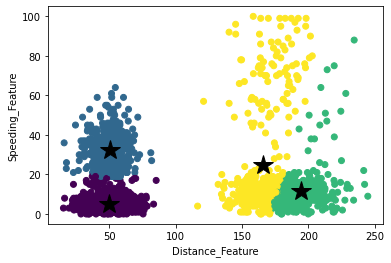

In [24]:
kmeans2 = KMeans(n_clusters=4, init='random').fit(
    df[['Distance_Feature','Speeding_Feature']]
)
plt.scatter(
    x=df['Distance_Feature'],
    y=df['Speeding_Feature'],
    c=kmeans2.labels_)
# Visualise the cluster centers (black stars)
plt.plot(
    kmeans2.cluster_centers_[:,0],
    kmeans2.cluster_centers_[:,1],
    'k*',
    markersize=20
)
plt.xlabel('Distance_Feature')
plt.ylabel('Speeding_Feature')
plt.show()